# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Naufal Nugroho
- **Email:** naufalnugroho1@gmail.com
- **ID Dicoding:** avuz123

## Menentukan Pertanyaan Bisnis

1.Bulan Dengan Jumlah Pengguna Sepeda Terbanyak ada pada Bulan?
2.Musim Dengan Jumlah Perentalan terbanyak ada pada musim?
3.Perbandingan Antara Peminjam Sepeda dengan kategori Pengguna Terdaftar Diaplikasi dengan Pengguna Tidak Terdaftar Diaplikasi?
4.Apa penyebab terjadinya penurunan perentalan dan seberapa buruk dampaknya di bulan Sep, Okt, Nov Tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [209]:
hour_df = pd.read_csv('Data/hour.csv',delimiter=',')

In [210]:
day_df = pd.read_csv('Data/day.csv',delimiter=',')

In [211]:
mixed_df = pd.merge(
     left=day_df,
     right=hour_df,
     how="outer",
     left_on="dteday",
     right_on="dteday")

### Assessing Data

In [213]:
hour_df['yr'] = hour_df['yr'].apply(lambda x: 2011 if x == 0 else 2012)

In [214]:
season = ["Spring", "Summer", "Fall", "Winter"]
hour_df['season'] = hour_df['season'].apply(
    lambda x: "Spring" if x == 1 else "Summer" if x == 2 else "Fall" if x == 3 
    else "Winter")
hour_df['season'] = pd.Categorical(hour_df['season'], categories=season, ordered=True)
hour_df.sort_values(by="season",inplace=True)

In [215]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
hour_df['mnth'] = hour_df['mnth'].apply(
    lambda x: "Jan" if x == 1 else "Feb" if x == 2 else "Mar" if x == 3 
    else "Apr" if x == 4 else "May" if x == 5 else "Jun" if x == 6 
    else "Jul" if x == 7 else "Aug" if x == 8 else "Sep" if x == 9
    else "Oct" if x == 10 else "Nov" if x == 11 else "Dec")
hour_df['mnth'] = pd.Categorical(hour_df['mnth'], categories=months, ordered=True)
hour_df.sort_values(by="mnth",inplace=True)

In [216]:
hour_df['dteday'] = hour_df['dteday'].apply(lambda x: x.split('-')[2])
hour_df.sort_values(by="dteday",inplace=True)

### Cleaning Data

In [218]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [219]:
hour_df.duplicated().sum()

0

In [220]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [221]:
day_df.duplicated().sum()

0

In [222]:
#Data Sudah Bersih.

## Exploratory Data Analysis (EDA)

### Explore ...

In [225]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,31,4,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01,Fall,NaN,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,575,4496,NaN,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,2012.000000,NaN,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,2012.000000,NaN,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [226]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [227]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12706,12707,18,Summer,2012,Jun,15,0,1,1,2,0.60,0.5909,0.69,0.1940,61,176,237
8134,8135,10,Winter,2011,Dec,14,0,6,0,1,0.34,0.3030,0.31,0.3284,51,242,293
14813,14814,14,Fall,2012,Sep,10,0,5,1,2,0.68,0.6364,0.65,0.0000,75,171,246
13008,13009,01,Fall,2012,Jul,5,0,0,0,1,0.68,0.6364,0.79,0.1045,3,7,10
14196,14197,19,Fall,2012,Aug,17,0,0,0,2,0.64,0.5909,0.78,0.1045,76,267,343
5657,5658,29,Fall,2011,Aug,4,0,1,1,1,0.56,0.5303,0.68,0.1343,0,3,3
13120,13121,05,Fall,2012,Jul,21,0,4,1,1,0.84,0.7727,0.47,0.1940,91,232,323
15637,15638,18,Winter,2012,Oct,18,0,4,1,2,0.56,0.5303,0.64,0.3284,68,720,788
6264,6265,23,Winter,2011,Sep,14,0,5,1,3,0.60,0.5000,1.00,0.0896,3,21,24
9920,9921,23,Spring,2012,Feb,9,0,4,1,1,0.36,0.3333,0.81,0.2537,14,228,242


In [228]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
117,118,2011-04-28,2,0,4,0,4,1,2,0.617500,0.578929,0.700833,0.320908,569,3489,4058
245,246,2011-09-03,3,0,9,0,6,0,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484
612,613,2012-09-04,3,1,9,0,2,1,1,0.725833,0.686888,0.755000,0.236321,867,5997,6864
276,277,2011-10-04,4,0,10,0,2,1,1,0.484167,0.472858,0.710000,0.205854,486,3970,4456
247,248,2011-09-05,3,0,9,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236,2115,3351
67,68,2011-03-09,1,0,3,0,3,1,2,0.295833,0.286608,0.775417,0.220150,191,1700,1891
272,273,2011-09-30,4,0,9,0,5,1,1,0.564167,0.544829,0.647500,0.206475,830,4372,5202
174,175,2011-06-24,3,0,6,0,5,1,1,0.724167,0.656583,0.573333,0.222025,969,4022,4991
354,355,2011-12-21,1,0,12,0,3,1,2,0.428333,0.428017,0.858333,0.221400,107,2553,2660
130,131,2011-05-11,2,0,5,0,3,1,1,0.542500,0.528400,0.632917,0.120642,550,3632,4182


In [229]:
hour_df.groupby(by=["yr", "season"], observed=False).agg({"casual": "sum","registered":"sum","cnt":"sum"})

casual  registered     cnt
yr   season                            
2011 Spring   21425      128575  150000
     Summer   77564      269752  347316
     Fall     95450      324200  419650
     Winter   52813      273324  326137
2012 Spring   39197      282151  321348
     Summer  125958      445315  571273
     Fall    130641      510838  641479
     Winter   76969      438507  515476

In [230]:
hour_df.groupby(by=["yr", "mnth"], observed=False).agg({"casual": "sum","registered": "sum","cnt":  "sum"})

casual  registered     cnt
yr   mnth                            
2011 Jan     3073       35116   38189
     Feb     6242       41973   48215
     Mar    12826       51219   64045
     Apr    22346       72524   94870
     May    31050      104771  135821
     Jun    30612      112900  143512
     Jul    36452      104889  141341
     Aug    28842      107849  136691
     Sep    26545      100873  127418
     Oct    25222       98289  123511
     Nov    15594       86573  102167
     Dec     8448       78875   87323
2012 Jan     8969       87775   96744
     Feb     8721       94416  103137
     Mar    31618      133257  164875
     Apr    38456      135768  174224
     May    44235      151630  195865
     Jun    43294      159536  202830
     Jul    41705      161902  203607
     Aug    43197      171306  214503
     Sep    43778      174795  218573
     Oct    34538      164303  198841
     Nov    21009      131655  152664
     Dec    13245      110468  123713

In [231]:
day_df.groupby(by=["yr", "season"], observed=False).agg({"casual": "sum","registered": "sum","cnt":  "sum"})

casual  registered     cnt
yr season                            
0  1        21425      128575  150000
   2        77564      269752  347316
   3        95450      324200  419650
   4        52813      273324  326137
1  1        39197      282151  321348
   2       125958      445315  571273
   3       130641      510838  641479
   4        76969      438507  515476

In [232]:
day_df.groupby(by=["yr", "mnth"], observed=False).agg({"casual": "sum","registered": "sum","cnt":  "sum"})

casual  registered     cnt
yr mnth                            
0  1       3073       35116   38189
   2       6242       41973   48215
   3      12826       51219   64045
   4      22346       72524   94870
   5      31050      104771  135821
   6      30612      112900  143512
   7      36452      104889  141341
   8      28842      107849  136691
   9      26545      100873  127418
   10     25222       98289  123511
   11     15594       86573  102167
   12      8448       78875   87323
1  1       8969       87775   96744
   2       8721       94416  103137
   3      31618      133257  164875
   4      38456      135768  174224
   5      44235      151630  195865
   6      43294      159536  202830
   7      41705      161902  203607
   8      43197      171306  214503
   9      43778      174795  218573
   10     34538      164303  198841
   11     21009      131655  152664
   12     13245      110468  123713

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pertanyaan 1 Bulan Dengan Jumlah Pengguna Sepeda Terbanyak ada pada Bulan?

In [236]:
table = hour_df.rename(columns={'yr' : 'Year', 'season' : 'Season', 'casual' : 'Pengguna Tidak Terdaftar', 'registered' : 'Pengguna Terdaftar', 'cnt' : 'Total', 'dteday' : 'Day', 'mnth' : 'Month' })

In [237]:
day_df.groupby(by=["yr", "mnth"], observed=False).agg({"casual": "sum","registered": "sum","cnt":  "sum"})

casual  registered     cnt
yr mnth                            
0  1       3073       35116   38189
   2       6242       41973   48215
   3      12826       51219   64045
   4      22346       72524   94870
   5      31050      104771  135821
   6      30612      112900  143512
   7      36452      104889  141341
   8      28842      107849  136691
   9      26545      100873  127418
   10     25222       98289  123511
   11     15594       86573  102167
   12      8448       78875   87323
1  1       8969       87775   96744
   2       8721       94416  103137
   3      31618      133257  164875
   4      38456      135768  174224
   5      44235      151630  195865
   6      43294      159536  202830
   7      41705      161902  203607
   8      43197      171306  214503
   9      43778      174795  218573
   10     34538      164303  198841
   11     21009      131655  152664
   12     13245      110468  123713

C:\Users\naufa\AppData\Local\Temp\ipykernel_2792\1843332602.py:9: UserWarning: 
The palette list has fewer values (9) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="Total", x="Month", data=total_2011, hue="Total", palette=colors, ax=ax[0])
C:\Users\naufa\AppData\Local\Temp\ipykernel_2792\1843332602.py:15: UserWarning: 
The palette list has fewer values (9) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="Total", x="Month", data=total_2012, hue="Total", palette=colors, ax=ax[1])


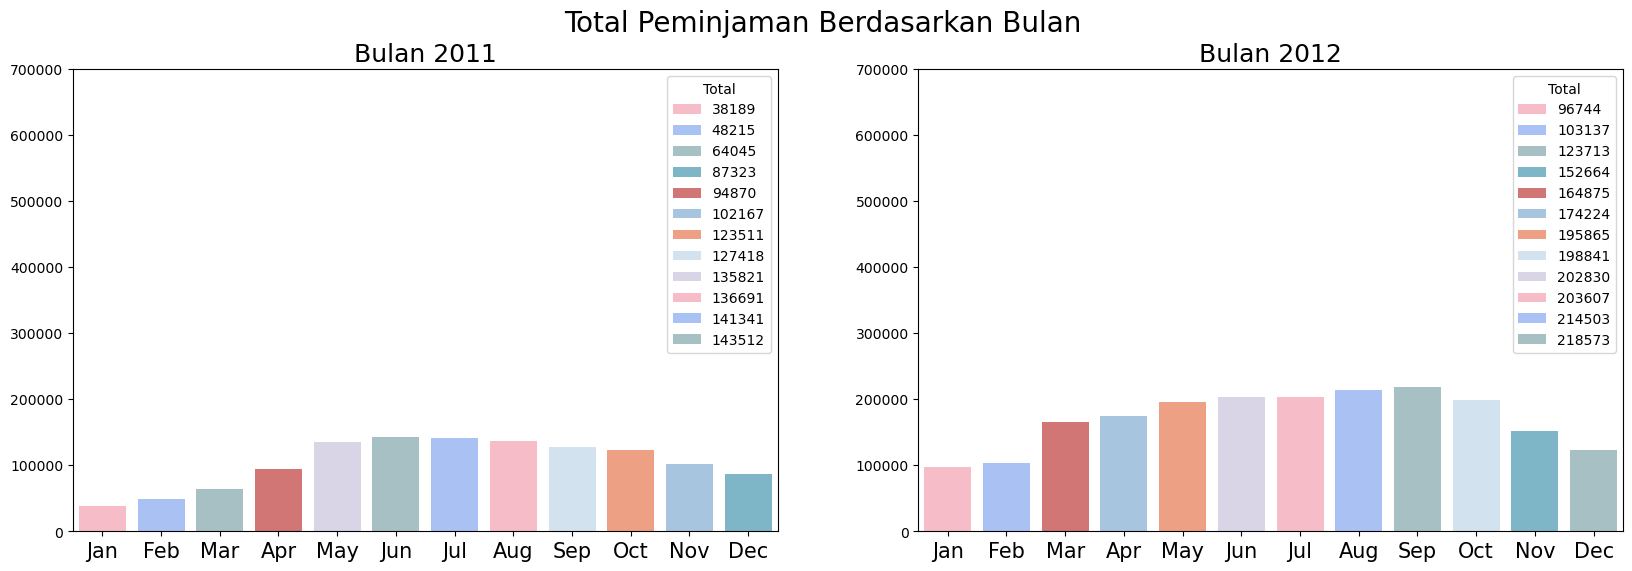

In [238]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
colors = ["#FFB4C2", "#9DBDFF", "#a2c4c9","#72BCD4","#e06666","#9fc5e8", "#FF9874","#cfe2f3","#d9d2e9"]
year_2011 = table['Year'].values == 2011
total_2011 = table[year_2011]
total_2011 = total_2011.groupby(by="Month", observed=False).agg({"Total":  "sum"})
year_2012 = table['Year'].values == 2012
total_2012 = table[mask_2012]
total_2012 = total_2012.groupby(by="Month", observed=False).agg({"Total":  "sum"})
sns.barplot(y="Total", x="Month", data=total_2011, hue="Total", palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Bulan 2011", loc="center", fontsize=18)
ax[0].set_ylim(0, 700000)
ax[0].tick_params(axis ='x', labelsize=15)
sns.barplot(y="Total", x="Month", data=total_2012, hue="Total", palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Bulan 2012", loc="center", fontsize=18)
ax[1].set_ylim(0, 700000)
ax[1].tick_params(axis ='x', labelsize=15)
plt.suptitle("Total Peminjaman Berdasarkan Bulan", fontsize=20)
plt.show()

Berdasarkan data yang telah diperoleh dan diolah dengan barchart, maka bulan dengan peminjam sepeda terbanyak jatuh pada bulan Juni 2011 dengan sebanyak 143.512 dan untuk di tahun 2012 adalah pada bulan September sebanyak 218.573.

### Pertanyaan 2:

Musim Dengan Jumlah Perentalan terbanyak ada pada musim?

In [242]:
table.groupby(by=["Year", "Season"], observed=False).agg({"Total":  "sum"})

Total
Year Season        
2011 Spring  150000
     Summer  347316
     Fall    419650
     Winter  326137
2012 Spring  321348
     Summer  571273
     Fall    641479
     Winter  515476

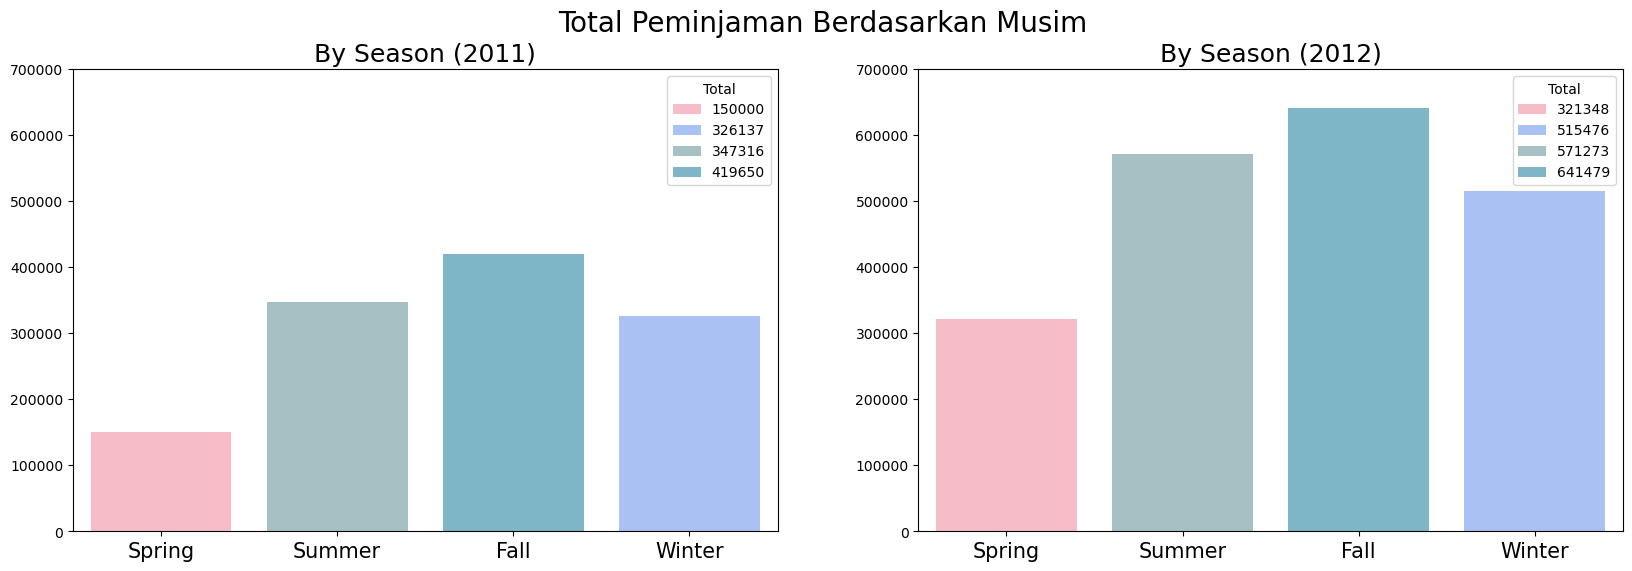

In [243]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
colors = ["#FFB4C2", "#9DBDFF", "#a2c4c9","#72BCD4"]
years_2011 = table['Year'].values == 2011
total_2011 = table[mask_2011]
total_2011 = total_2011.groupby(by="Season", observed=False).agg({"Total":  "sum"})
years_2012 = table['Year'].values == 2012
total_2012 = table[mask_2012]
total_2012 = total_2012.groupby(by="Season", observed=False).agg({"Total":  "sum"})
sns.barplot(y="Total", x="Season", data=total_2011, hue="Total", palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Season (2011)", loc="center", fontsize=18)
ax[0].set_ylim(0, 700000)
ax[0].tick_params(axis ='x', labelsize=15)
sns.barplot(y="Total", x="Season", data=total_2012, hue="Total", palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Season (2012)", loc="center", fontsize=18)
ax[1].set_ylim(0, 700000)
ax[1].tick_params(axis ='x', labelsize=15)
plt.suptitle("Total Peminjaman Berdasarkan Musim", fontsize=20)
plt.show()

Berdasarkan data yang telah diperoleh dan diolah dengan barchart, maka musim dengan peminjam sepeda terbanyak jatuh pada Musim Gugur dimana terdapat sebanyak 419.650 pada tahun 2011 dan 571.273 pada tahun 2012

### Pertanyaan 3:

Perbandingan Antara Peminjam Sepeda dengan kategori Pengguna Terdaftar Diaplikasi dengan Pengguna Tidak Terdaftar Diaplikasi?

Untuk mempermudah visualisasi data, dengan mengkategorikan data berdasarkan Tahun, dan Bulan. berikut adalah hasil dari perbandingan antara peminjam 'Pengguna Tidak Terdaftar' dan peminjam 'Pengguna Terdaftar' pada bisnis "Bike Sharing":

In [248]:
data_compare = table.groupby(by=["Year", "Month"], observed=False).agg({'Pengguna Tidak Terdaftar' : 'sum','Pengguna Terdaftar' : 'sum','Total':  'sum',})
data_compare["difference"] = data_compare["Pengguna Terdaftar"] - data_compare["Pengguna Tidak Terdaftar"]
data_compare["diff_percent"] = round(data_compare["difference"] / data_compare["Total"] * 100, 2)
data_compare

Pengguna Tidak Terdaftar  Pengguna Terdaftar   Total  difference  \
Year Month                                                                     
2011 Jan                        3073               35116   38189       32043   
     Feb                        6242               41973   48215       35731   
     Mar                       12826               51219   64045       38393   
     Apr                       22346               72524   94870       50178   
     May                       31050              104771  135821       73721   
     Jun                       30612              112900  143512       82288   
     Jul                       36452              104889  141341       68437   
     Aug                       28842              107849  136691       79007   
     Sep                       26545              100873  127418       74328   
     Oct                       25222               98289  123511       73067   
     Nov                       15594               86573  102167       70979   
     Dec                        8448               78875   87323       70427   
2012 Jan                        8969               87775   96744       78806   
     Feb                        8721               94416  103137       85695   
     Mar                       31618              133257  164875      101639   
     Apr                       38456              135768  174224       97312   
     May                       44235              151630  195865      107395   
     Jun                       43294              159536  202830      116242   
     Jul                       41705              161902  203607      120197   
     Aug                       43197              171306  214503      128109   
     Sep                       43778              174795  218573      131017   
     Oct                       34538              164303  198841      129765   
     Nov                       21009              131655  152664      110646   
     Dec                       13245              110468  123713       97223   

            diff_percent  
Year Month                
2011 Jan           83.91  
     Feb           74.11  
     Mar           59.95  
     Apr           52.89  
     May           54.28  
     Jun           57.34  
     Jul           48.42  
     Aug           57.80  
     Sep           58.33  
     Oct           59.16  
     Nov           69.47  
     Dec           80.65  
2012 Jan           81.46  
     Feb           83.09  
     Mar           61.65  
     Apr           55.85  
     May           54.83  
     Jun           57.31  
     Jul           59.03  
     Aug           59.72  
     Sep           59.94  
     Oct           65.26  
     Nov           72.48  
     Dec           78.59

Karena selisih peminjam antara kedua jenis pengguna sangat bervariasi, kita hitung rata-ratanya agar lebih mudah dipahami. Berikut adalah rata-rata selisih tersebut:

In [250]:
round(data_compare.diff_percent.mean(), 2)

64.4

berdasarkan hasil diatas diketahuai rata rata yang didapat adalah 64.4% antara peminjam 'Pengguna Tidak Terdaftar' dan peminjam 'Pengguna Terdaftar'

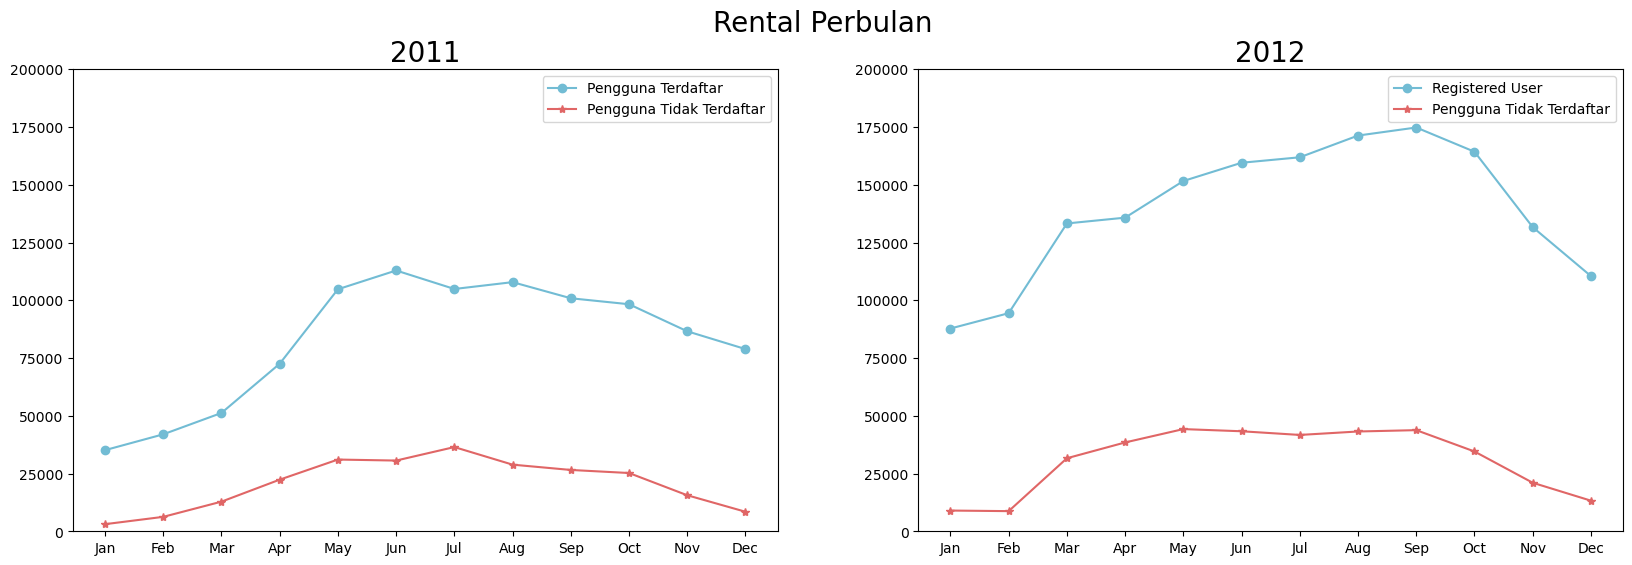

In [252]:
years_2011 = table['Year'].values == 2011
user_2011 = table[years_2011]
user_2011 = user_2011.groupby(by="Month", observed=False).agg({'Pengguna Tidak Terdaftar' : 'sum','Pengguna Terdaftar' : 'sum','Total':  'sum',})
years_2012 = table['Year'].values == 2012
user_2012 = table[years_2012]
user_2012 = user_2012.groupby(by="Month", observed=False).agg({'Pengguna Tidak Terdaftar' : 'sum','Pengguna Terdaftar' : 'sum','Total':  'sum',})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(months, user_2011['Pengguna Terdaftar'], label='Pengguna Terdaftar', marker="o", color='#72BCD4', figure=fig)
ax[0].plot(months, user_2011['Pengguna Tidak Terdaftar'], label='Pengguna Tidak Terdaftar', marker="*", color='#e06666', figure=fig)
ax[0].set_title("2011", loc="center", fontsize=20)
ax[0].set_ylim(0, 200000)
ax[0].legend()
ax[1].plot(months, user_2012['Pengguna Terdaftar'], label='Registered User', marker="o", color='#72BCD4', figure=fig)
ax[1].plot(months, user_2012['Pengguna Tidak Terdaftar'], label='Pengguna Tidak Terdaftar', marker="*", color='#e06666', figure=fig)
ax[1].set_title("2012", loc="center", fontsize=20)
ax[1].set_ylim(0, 200000)
ax[1].legend()
plt.suptitle("Rental Perbulan", fontsize=20)
plt.show()

### Pertanyaan 4:

Apa penyebab terjadinya penurunan perentalan dan seberapa buruk dampaknya di bulan Sep, Okt, Nov Tahun 2012?

Pada tanggal 29 Oktober 2012 terjadilah sebuah bencana alam yang bernama Hurricane Sandy, yang memiliki dampak yang buruk pada perekonomian USA, hal ini juga merambat pada bisnis Bike Sharing ,Data menunjukkan dampak Badai Sandy terhadap bisnis penyewaan sepeda, khususnya pada kategori 'Day'. Dampaknya divisualisasikan dalam tabel dan grafik:

In [256]:
years_2012 = table['Year'].values == 2012
data_2012 = table[years_2012]
month_sep = data_2012['Month'].values == 'Sep'
data_sep = data_2012[month_sep]
month_oct = data_2012['Month'].values == 'Oct'
data_oct = data_2012[month_oct]
month_nov = data_2012['Month'].values == 'Nov'
data_nov = data_2012[month_nov]
data_sep = data_sep.groupby(by="Day", observed=True).agg({'Day': 'unique','Total':  'sum'})
data_oct = data_oct.groupby(by="Day", observed=True).agg({'Day': 'unique','Total':  'sum'})
data_nov = data_nov.groupby(by="Day", observed=True).agg({'Day': 'unique','Total':  'sum'})
data_merge = data_oct
data_merge['Sep'] = data_sep['Total']
data_merge['Oct'] = data_oct['Total']
data_merge['Nov'] = data_nov['Total']
data_merge

,Day,Total,Sep,Oct,Nov
Day,,,,,
01,[01],6778,6140.0,6778,5986.0
02,[02],4639,5810.0,4639,5847.0
03,[03],7572,6034.0,7572,5138.0
04,[04],7328,6864.0,7328,5107.0
05,[05],8156,7112.0,8156,5259.0
06,[06],7965,6203.0,7965,5686.0
07,[07],3510,7504.0,3510,5035.0
08,[08],5478,5976.0,5478,5315.0
09,[09],6392,8227.0,6392,5992.0


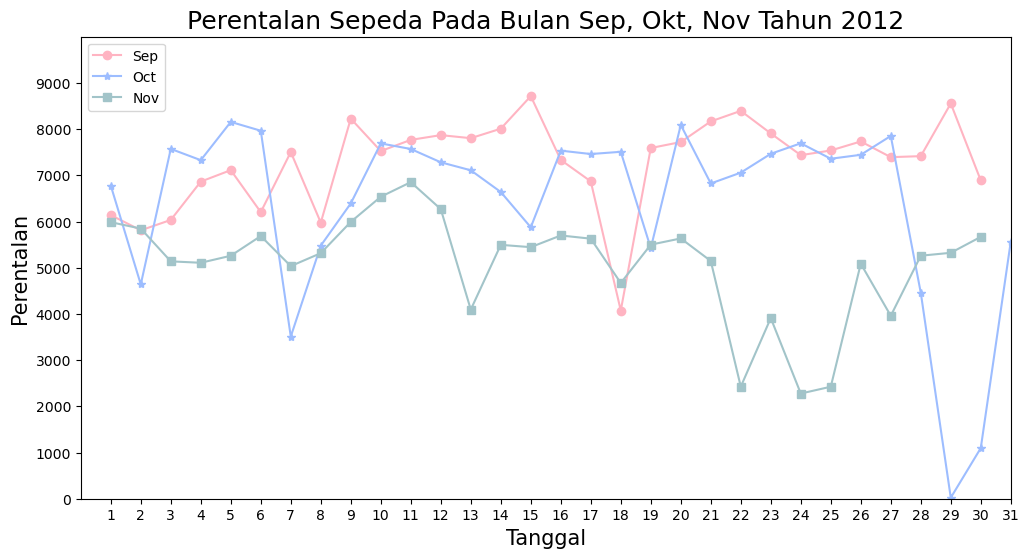

In [257]:
plt.figure(figsize=(12, 6))
plt.plot(data_sep['Day'], data_sep['Total'], marker="o", label='Sep', color='#FFB4C2')
plt.plot(data_oct['Day'], data_oct['Total'], marker="*", label='Oct', color='#9DBDFF')
plt.plot(data_nov['Day'], data_nov['Total'], marker="s", label='Nov', color='#a2c4c9')
plt.title('Perentalan Sepeda Pada Bulan Sep, Okt, Nov Tahun 2012', size=18)
plt.xlabel('Tanggal',size=15)
plt.ylabel('Perentalan',size=15)
plt.xticks(np.arange(1, 32, 1))
plt.yticks(np.arange(0, 10000, 1000))
plt.ylim(0, 10000)
plt.xlim(0, 31)
plt.legend()
plt.show()

Bisnis penyewaan sepeda mengalami penurunan drastis saat Badai Sandy (29-30 Oktober 2012), tetapi berhasil pulih dengan cepat.

## Analisis Lanjutan (Opsional)

In [294]:
data_cleaned = hour_df.to_csv('hour_cleaned.csv')

## Conclusion

1.Bulan Dengan Jumlah Pengguna Sepeda Terbanyak ada pada Bulan?
Berdasarkan data yang telah diperoleh dan diolah dengan barchart, maka bulan dengan peminjam sepeda terbanyak jatuh pada bulan Juni 2011 dengan
sebanyak 143.512 dan untuk di tahun 2012 adalah pada bulan September sebanyak 218.573.

2.Musim Dengan Jumlah Perentalan terbanyak ada pada musim?
Berdasarkan data yang telah diperoleh dan diolah dengan barchart, maka musim dengan peminjam sepeda terbanyak jatuh pada Musim Gugur dimana terdapat sebanyak 419.650 pada tahun 2011 dan 571.273 pada tahun 2012

3.Perbandingan Antara Peminjam Sepeda dengan kategori Pengguna Terdaftar Diaplikasi dengan Pengguna Tidak Terdaftar Diaplikasi?
rata rata yang didapat adalah 64.4% antara peminjam 'Pengguna Tidak Terdaftar' dan peminjam 'Pengguna Terdaftar'

4.Apa penyebab terjadinya penurunan perentalan dan seberapa buruk dampaknya di bulan Sep, Okt, Nov Tahun 2012?
Bisnis penyewaan sepeda mengalami penurunan drastis saat Badai Sandy (29-30 Oktober 2012), tetapi berhasil pulih dengan cepat.